
# Task 4: Data Cleaning & Insights


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
file_path = "D:\Elevvo Internship tasks\Level 1\Task 4/kaggle_survey_2017_2021.csv"
df = pd.read_csv(file_path, low_memory=False)
df

,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
0,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
4,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106297,2017,NaN,22-24,Female,Other,Master's degree,NaN,Less than a year,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106298,2017,NaN,25-29,Male,Indonesia,Bachelor's degree,Programmer,1 to 2 years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106299,2017,NaN,25-29,Female,Taiwan,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106300,2017,NaN,NaN,Female,Singapore,I prefer not to answer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Rename columns for easier reference
df = df.rename(columns={
    'Q1': 'Age',
    'Q2': 'Gender',
    'Q3': 'Country',
    'Q4': 'Education',
    'Q5': 'Role'
})

#Drop unnecessary columns
df = df.drop(columns=['-', 'Time from Start to Finish (seconds)'], errors='ignore')

In [4]:
# Clean string values
df['Education'] = df['Education'].str.replace("â€™", "'", regex=False)
df['Gender'] = df['Gender'].str.strip().str.title()
df['Country'] = df['Country'].str.strip()

# Handle missing values
df = df.drop_duplicates()
df['Age'] = df['Age'].fillna("Unknown")
df['Gender'] = df['Gender'].fillna("Unknown")
df['Country'] = df['Country'].fillna("Unknown")
df['Education'] = df['Education'].fillna("Unknown")
df['Role'] = df['Role'].fillna("Unknown")

# Quick overview
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

Shape: (100041, 291)

Missing values:
 Age                   0
Gender                0
Country               0
Education             0
Role                  0
                  ...  
Q38_B_Part_6      98754
Q38_B_Part_7      98823
Q38_B_Part_9      98855
Q38_B_Part_11    100040
Q38_B_OTHER       99412
Length: 291, dtype: int64


In [5]:
#Summary statistics
print("\nRespondents by Gender:\n", df['Gender'].value_counts())
print("\nRespondents by Country:\n", df['Country'].value_counts().head(10))
print("\nRespondents by Role:\n", df['Role'].value_counts().head(10))


Respondents by Gender:
 Gender
Male                                                 43949
Man                                                  36087
Female                                                9376
Woman                                                 8709
Prefer Not To Say                                     1266
Prefer To Self-Describe                                224
A Different Identity                                   153
Nonbinary                                              140
Non-Binary, Genderqueer, Or Gender Non-Conforming       74
Unknown                                                 62
What Is Your Gender? - Selected Choice                   1
Name: count, dtype: int64

Respondents by Country:
 Country
India                                                   23228
United States of America                                12450
Other                                                    5440
China                                                    3294
Brazil     

In [6]:
#Categorical Encoding
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Gender', 'Education', 'Country', 'Role']

# Apply label encoding
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col + '_encoded'] = le.fit_transform(df[col])
    encoders[col] = le

# Quick check of encoded columns
df[['Gender', 'Gender_encoded', 'Education', 'Education_encoded']].head()


,Gender,Gender_encoded,Education,Education_encoded
0,What Is Your Gender? - Selected Choice,9,What is the highest level of formal education ...,10
1,Man,3,Bachelor's degree,0
2,Man,3,Master's degree,4
3,Man,3,Master's degree,4
4,Man,3,Doctoral degree,1


In [7]:
# Education vs Role (behavior insight)
edu_role = df.groupby(['Education', 'Role']).size().unstack(fill_value=0)
edu_role.head()


Role,Business Analyst,Chief Officer,Computer Scientist,Consultant,Currently not employed,DBA/Database Engineer,Data Analyst,Data Engineer,Data Journalist,Data Miner,...,Research Scientist,Researcher,Salesperson,Scientist/Researcher,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,Software Developer/Software Engineer,Software Engineer,Statistician,Student,Unknown
Education,,,,,,,,,,,,,,,,,,,,,
Bachelor's degree,1272,73,71,212,1564,293,2916,802,10,30,...,350,93,36,72,0,523,4248,283,9806,909
Doctoral degree,183,65,91,96,235,28,492,169,1,11,...,3148,202,2,420,0,94,538,390,1276,265
I did not complete any formal education past high school,5,0,4,0,0,1,11,0,0,2,...,0,4,0,4,0,20,0,1,0,103
I prefer not to answer,66,2,1,11,157,22,141,53,1,1,...,72,2,1,1,0,8,229,11,321,111
Master's degree,2085,183,121,403,1313,333,3959,1246,7,63,...,1474,240,44,259,0,541,4243,637,7043,987


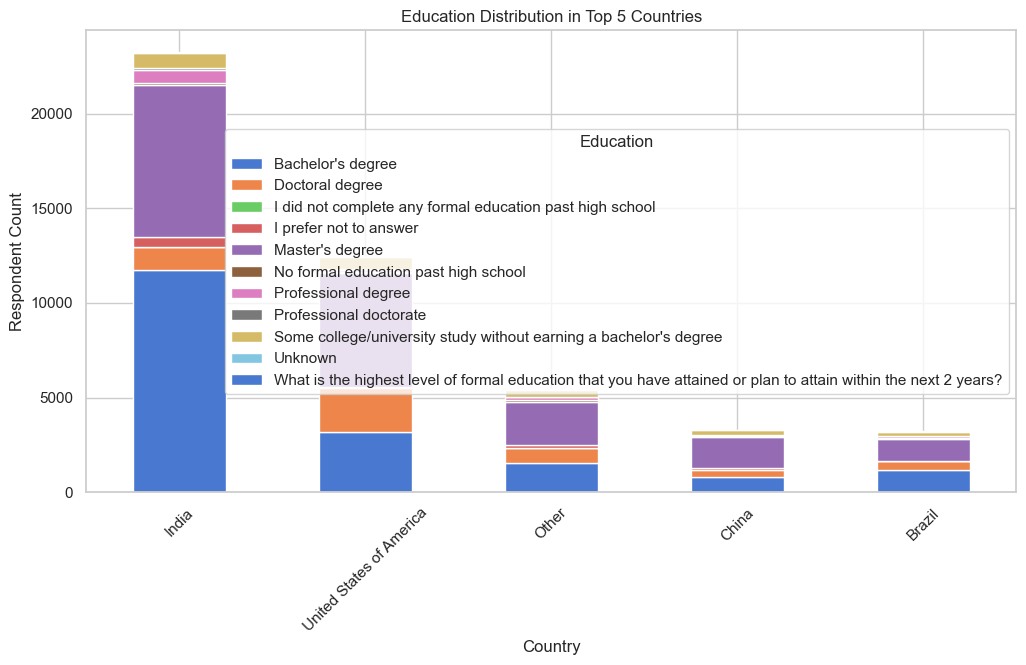

In [21]:
# Country vs Education

country_edu = df.groupby(['Country', 'Education']).size().unstack(fill_value=0)
top_countries = df['Country'].value_counts().head(5).index
country_edu.loc[top_countries].plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Education Distribution in Top 5 Countries")
plt.ylabel("Respondent Count")
plt.xticks(rotation=45)
plt.show()


The above graph shows that the Bachelor's deregree and Masters degree are the most common  highest level of education among the respondents in top five countries. The second-largest group is also bachelors (in blue); they are found in most countries. The general trend is the same, yet the United States seems to have a significantly higher percentage of individuals with Doctoral education (depicted in green) than the other leading nations.

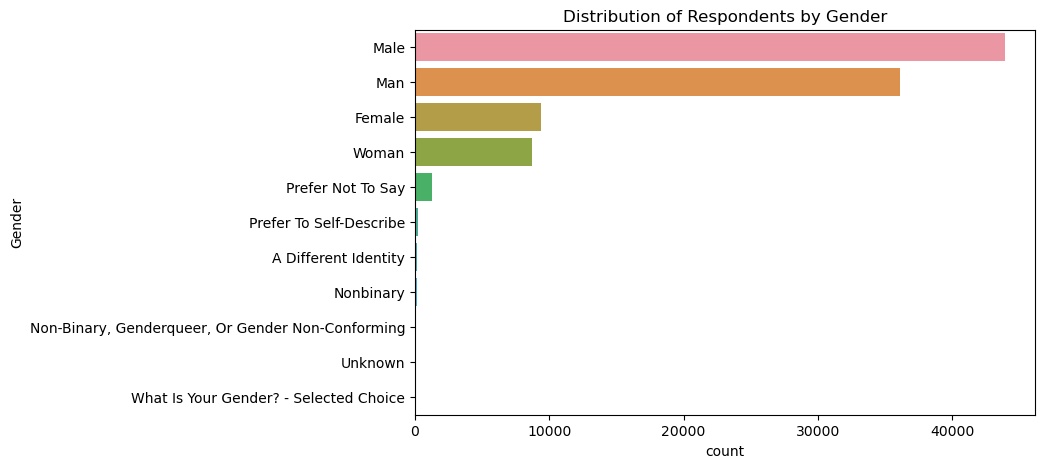

In [10]:
# Visualizations
plt.figure(figsize=(8,5))
sns.countplot(y='Gender', data=df, order=df['Gender'].value_counts().index)
plt.title("Distribution of Respondents by Gender")
plt.show()

According to the graph, it can be at a glance that only one gender, the gender of Man, possesses an immensely longer bar than any of the other genders, it means that that it is the most common answer by far. The other identities, such as Woman and Nonbinary, have much smaller bars, meaning that they constitute a much smaller fraction of the survey takers. In this visualization, the large gender disparity in the dataset is easily evident.

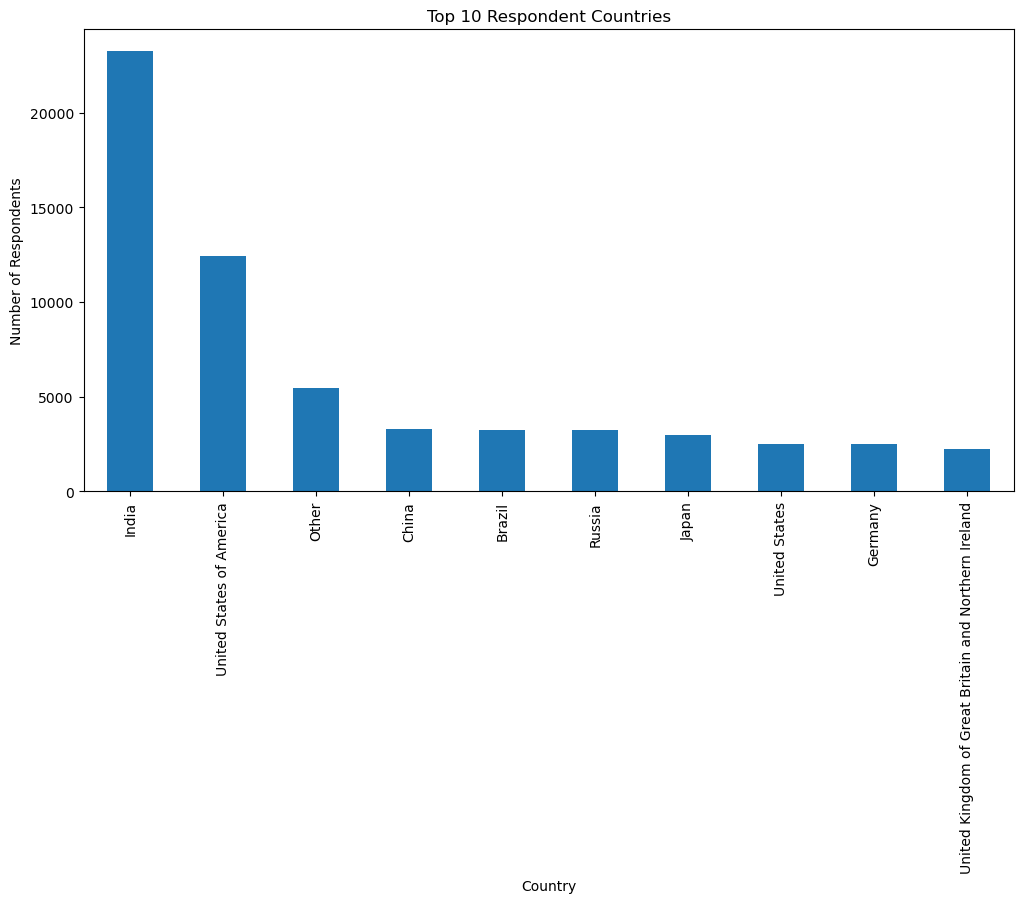

In [11]:
plt.figure(figsize=(12,6))
df['Country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Respondent Countries")
plt.ylabel("Number of Respondents")
plt.show()

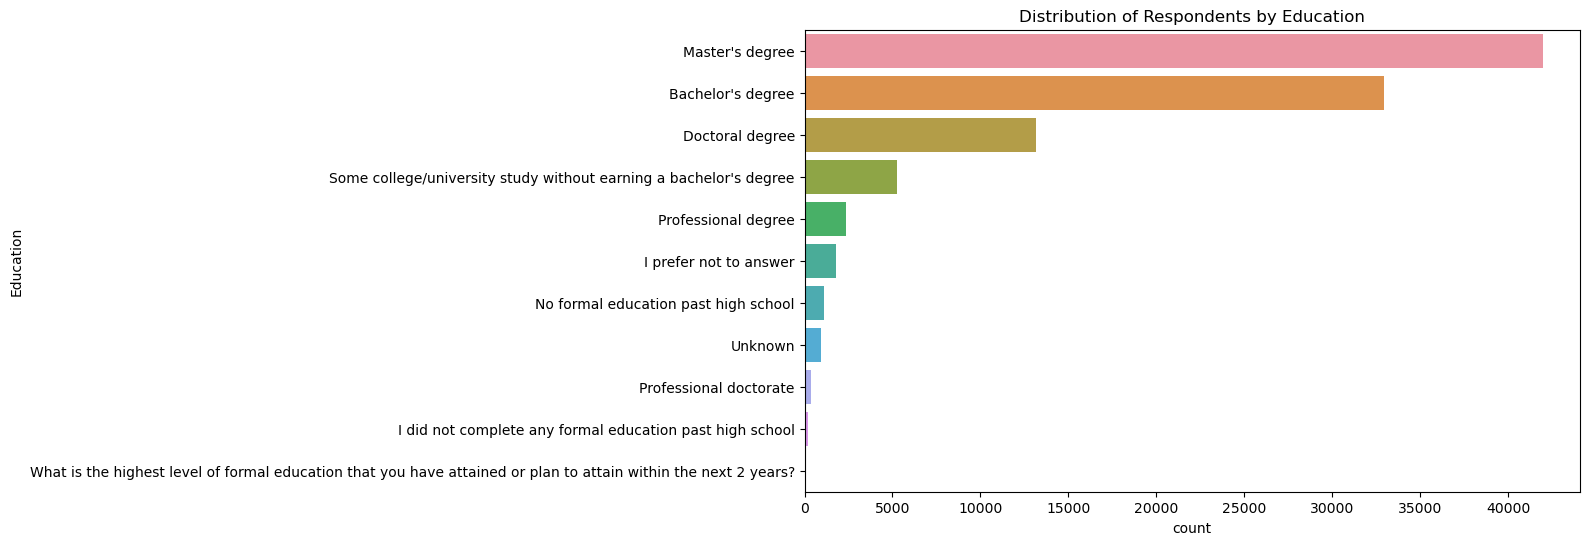

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(y='Education', data=df, order=df['Education'].value_counts().index)
plt.title("Distribution of Respondents by Education")
plt.show()

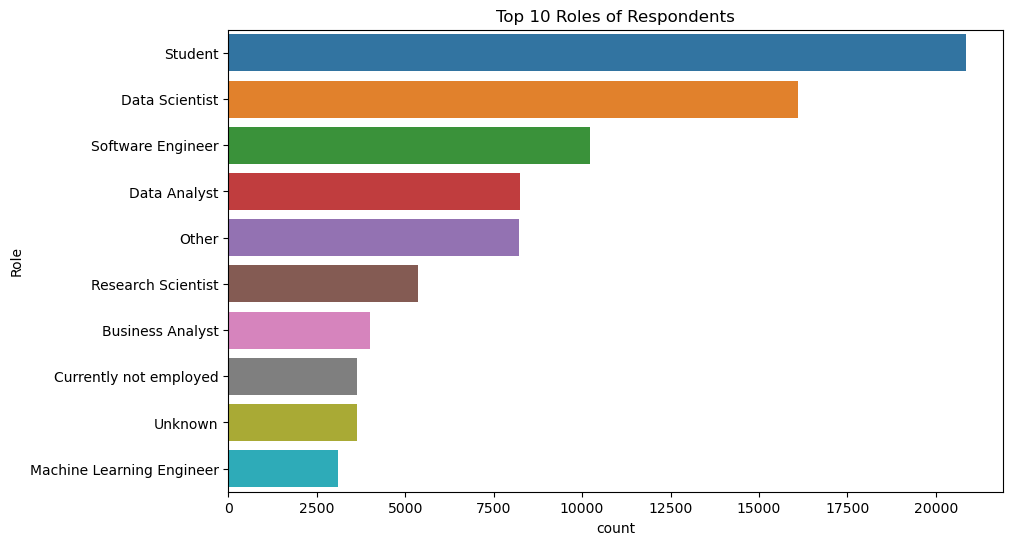

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(y='Role', data=df, order=df['Role'].value_counts().head(10).index)
plt.title("Top 10 Roles of Respondents")
plt.show()

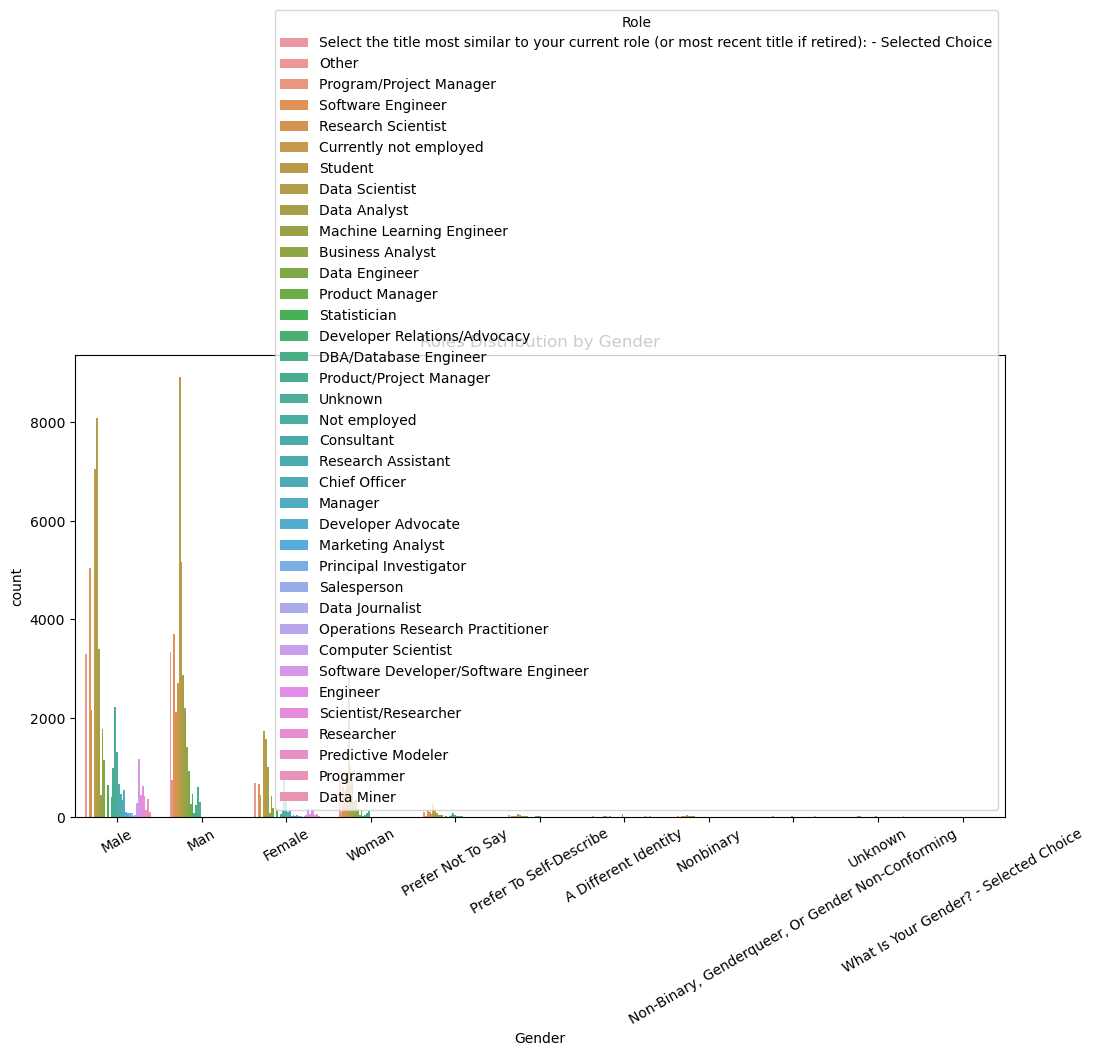

In [14]:
# 9. Cross-analysis (example: Gender vs Role)
plt.figure(figsize=(12,6))
sns.countplot(x='Gender', hue='Role', data=df, order=df['Gender'].value_counts().index)
plt.title("Roles Distribution by Gender")
plt.xticks(rotation=30)
plt.show()

## Bonus: Extract top 5 insights


In [15]:
print("Majority of respondents are from:", df['Country'].value_counts().idxmax())
print("Most common gender response:", df['Gender'].value_counts().idxmax())
print("Most common education level:", df['Education'].value_counts().idxmax())
print("Most common role:", df['Role'].value_counts().idxmax())
print("Number of unique countries represented:", df['Country'].nunique())

Majority of respondents are from: India
Most common gender response: Male
Most common education level: Master's degree
Most common role: Student
Number of unique countries represented: 79


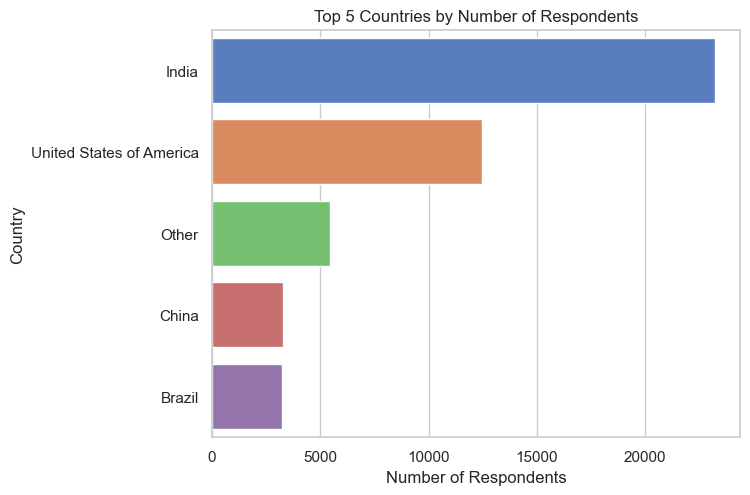

In [16]:
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(15, 18))

# Top 5 countries by respondents
if 'Country' in df.columns:
    plt.subplot(3, 2, 1)
    top_countries = df['Country'].value_counts().head(5)
    sns.barplot(x=top_countries.values, y=top_countries.index)
    plt.title("Top 5 Countries by Number of Respondents")
    plt.xlabel("Number of Respondents")
    plt.ylabel("Country")

This chart shows that the highest number of survey respondens are in in India country and iit shows that Brazil and Chine countries has the lowest number of survey respondent. Also it shows that the most peaple partcipated in survey are from India, US, Chine abd Brazil which should be the place where the data science and analytics are more common . it also shows that the responses from these countries represent a large part of dataset.